In [1]:
%load_ext autoreload
%autoreload 2

# Training


In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

from src.data_cleaning.controller import load_train_test_split

(
    X_train,
    y_train,
    w_train,
    X_test,
    y_test,
    w_test,
) = load_train_test_split(drop_na=False)


clf = xgb.XGBClassifier().fit(X_train, y_train, sample_weight=w_train)

print(f"train accuracy {accuracy_score(y_train, clf.predict(X_train))*100:.2f} %")
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"test accuracy {test_accuracy*100:.2f} %")

c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\src\data_cleaning\controller.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insee_line["Code Postal"] = line["code_postal"]
c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\src\data_cleaning\controller.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insee_line["Code Postal"] = line["code_postal"]


train accuracy 69.78 %
test accuracy 61.14 %


In [109]:
# save model

import os

os.makedirs("src/models", exist_ok=True)
clf.save_model(f"src/models/xgb_model_{test_accuracy:.4f}.json")

# Load model


In [113]:
import xgboost as xgb

best_model = "src/models/xgb_model_pessimist.json"

clf = xgb.XGBClassifier()
clf.load_model(best_model)

# Global explainability

You need to have a model in the memory before running those cells


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

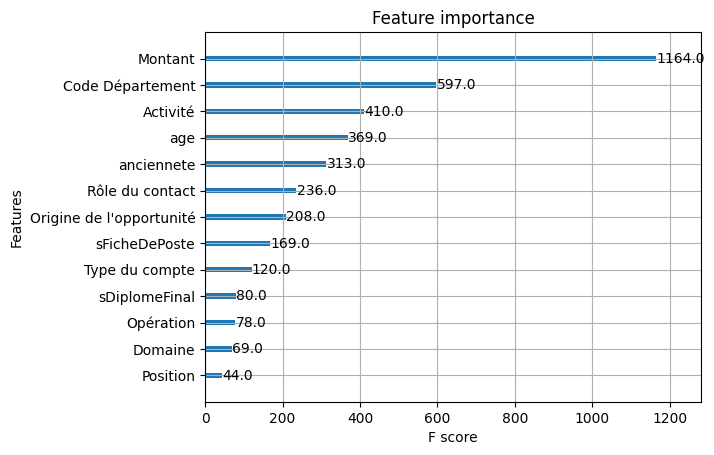

In [69]:
from src.ploting import plot_importance

plot_importance(clf)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

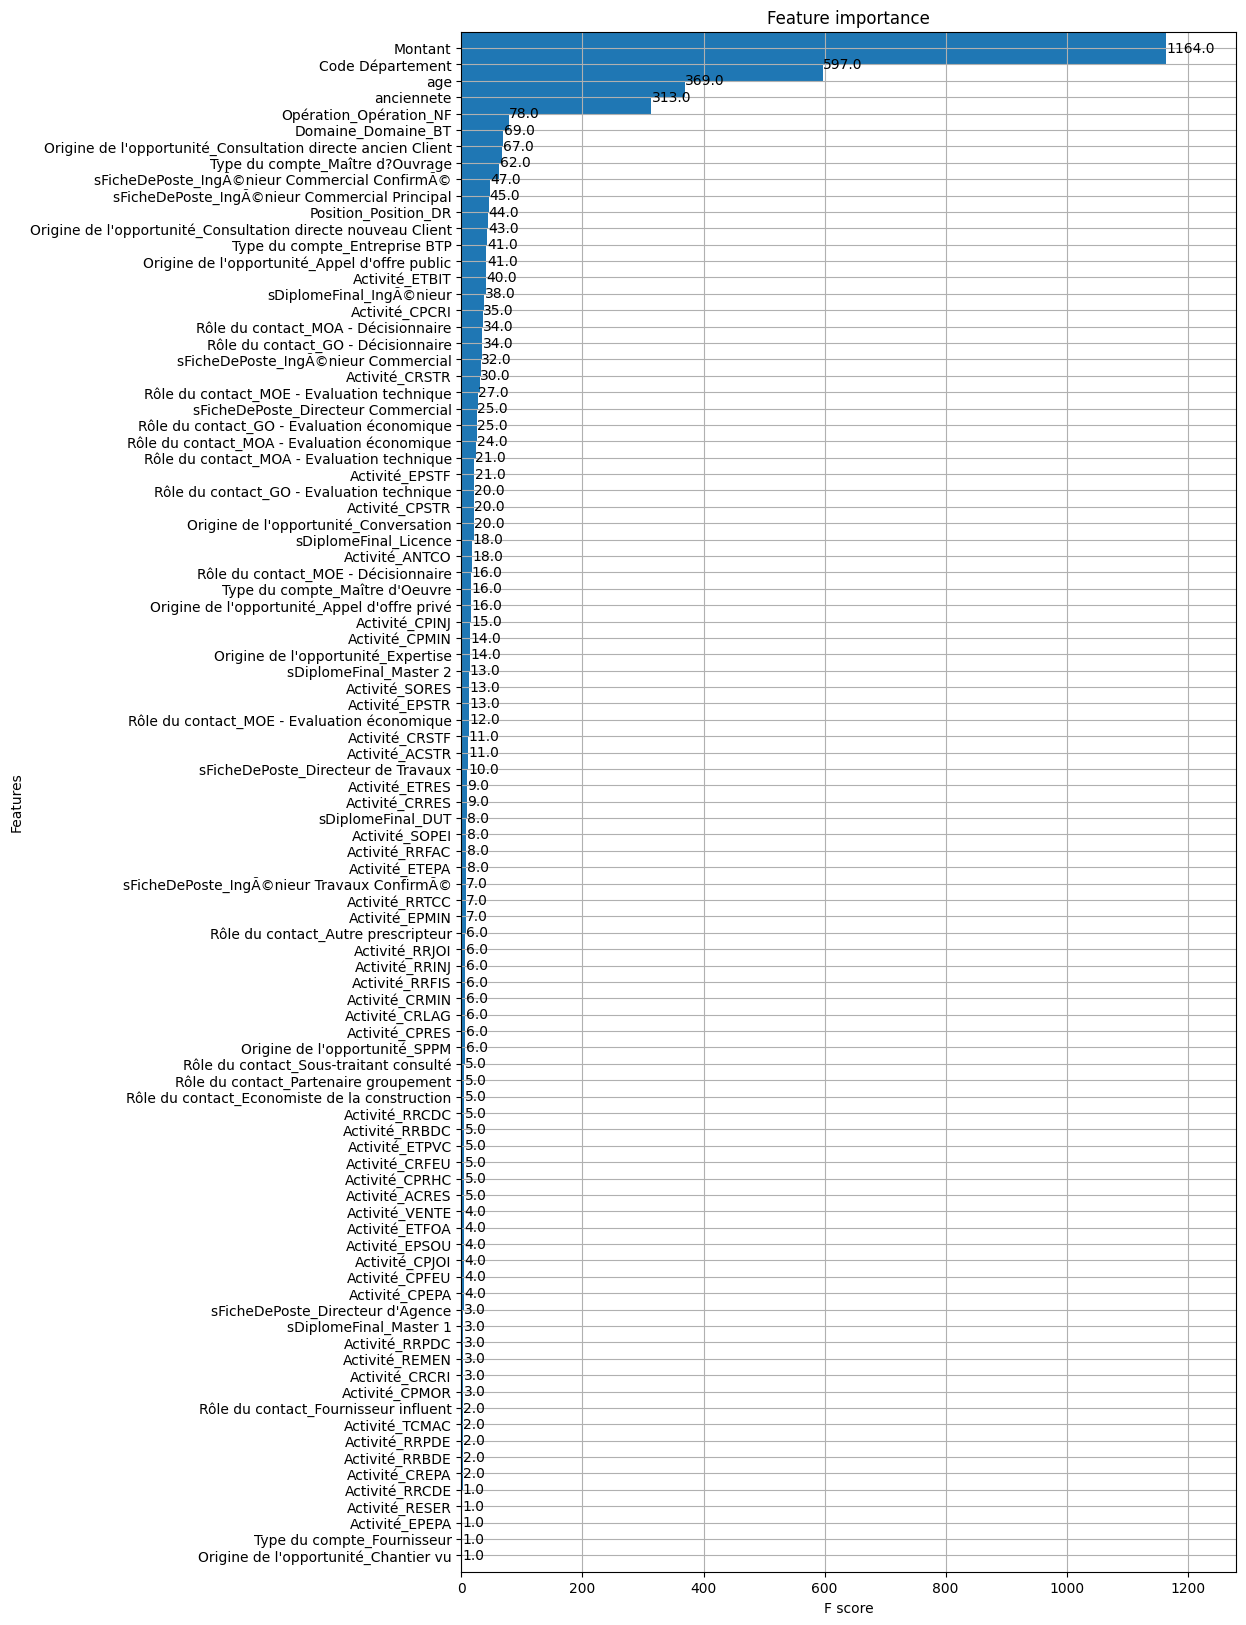

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))

xgb.plot_importance(clf, ax=ax, height=2)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


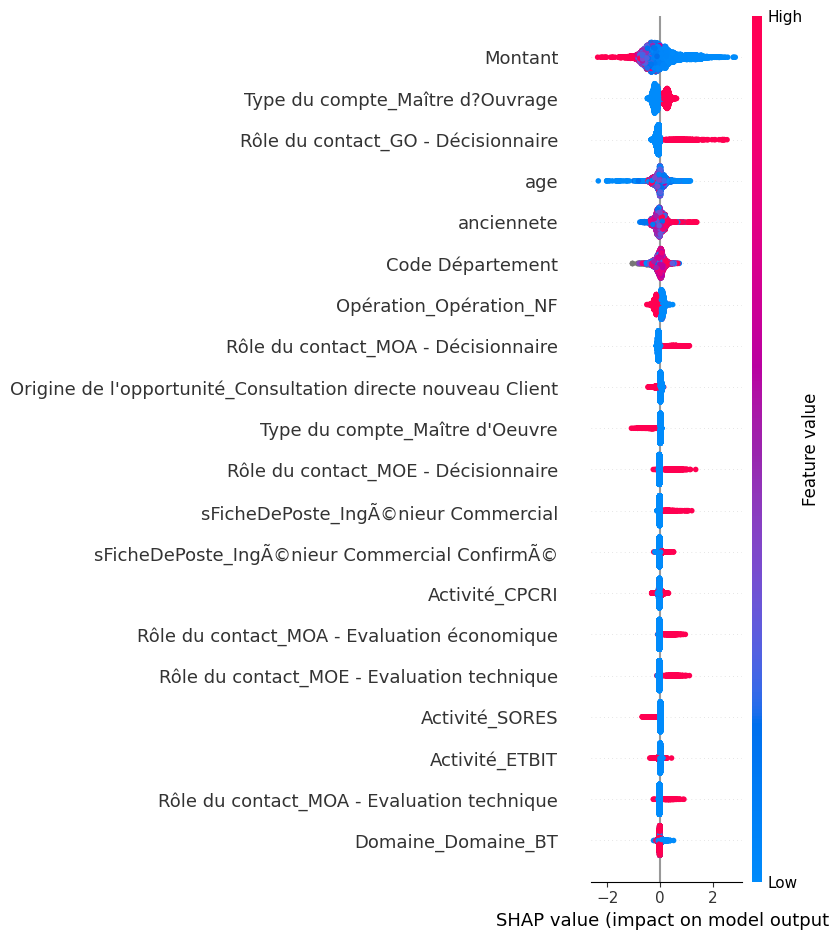

In [128]:
import shap
from src.data_cleaning.controller import load_train_test_split

shap.initjs()
X_train, y_train, w_train, X_test, y_test, w_test = load_train_test_split(drop_na=False)

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

# Local explainability

You need to have a model in the memory before running those cells


In [114]:
import shap
import numpy as np

from src.data_cleaning.controller import load_train_test_split

shap.initjs()

X_train, y_train, w_train, X_test, y_test, w_test = load_train_test_split(drop_na=False)

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)

INDEX = 0  # change this to choose the data point you want to explain

print(f"prediction: {clf.predict_proba(np.array(X_test.iloc[INDEX]).reshape(1, -1))}")

shap.force_plot(
    explainer.expected_value,
    shap_values[INDEX],
    features=X_test.iloc[INDEX],
    feature_names=X_test.columns,
)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


prediction: [[0.7042527  0.29574728]]


In [2]:
import numpy as np

from anchor import anchor_tabular
from src.data_cleaning.controller import load_train_test_split

X_train, y_train, w_train, X_test, y_test, w_test = load_train_test_split(drop_na=False)

explainer = anchor_tabular.AnchorTabularExplainer(
    ["perdue", "gagnée"],
    X_train.columns,
    X_train.values,
)

INDEX = 0  # change this to choose the data point you want to explain

print(clf.predict_proba(np.array(X_test.iloc[INDEX]).reshape(1, -1)))

exp = explainer.explain_instance(
    np.array(X_test.iloc[INDEX]), clf.predict, threshold=0.7
)

exp.show_in_notebook()

c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\src\data_cleaning\controller.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insee_line["Code Postal"] = line["code_postal"]
c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\src\data_cleaning\controller.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insee_line["Code Postal"] = line["code_postal"]
c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[[0.5454742 0.4545258]]


# Inference


In [ ]:
# from src.data_cleaning.controller import load_opportunities

# opportunities = load_opportunities()

# for opportunity_id in opportunities["N° Opportunité"].values:
#     sample = get_opportunity_from_id(opportunity_id)
#     if clf.predict(sample)[0]:
#         print(opportunity_id, clf.predict_proba(sample))
#         break

In [ ]:
from src.inference import get_opportunity_from_id

opportunity_id = "1806-66434"

sample = get_opportunity_from_id(opportunity_id)
print(clf.predict_proba(sample))

In [126]:
import shap
import numpy as np

from src.inference import get_opportunity_from_id

shap.initjs()

opportunity_id = "1709-62763"

sample = get_opportunity_from_id(opportunity_id)

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(sample)

print(f"prediction: {clf.predict_proba(np.array(sample.iloc[0]).reshape(1, -1))}")

shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    features=sample.iloc[0],
    feature_names=sample.columns,
)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


prediction: [[0.3135215 0.6864785]]


In [127]:
import numpy as np

from anchor import anchor_tabular
from src.data_cleaning.controller import load_train_test_split
from src.inference import get_opportunity_from_id

X_train, y_train, w_train, X_test, y_test, w_test = load_train_test_split(drop_na=False)

opportunity_id = "1709-62763"

sample = get_opportunity_from_id(opportunity_id)

explainer = anchor_tabular.AnchorTabularExplainer(
    ["perdue", "gagnée"],
    X_train.columns,
    X_train.values,
)

print(clf.predict_proba(np.array(sample.iloc[0]).reshape(1, -1)))

exp = explainer.explain_instance(np.array(sample.iloc[0]), clf.predict, threshold=0.9)

exp.show_in_notebook()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
invalid value encountered in reduce


[[0.3135215 0.6864785]]
